# Chapter.4 Single-variate Linear Regression

## Programming Assignment.4-04 Learning with Dataset

PA 4-04에서는 PA 4-02, PA 4-03의 내용들을 바탕으로 여러개의 data sample들을 가지고 있는 dataset에 대해 학습을 시켜봅니다.  

즉, PA 4-03에서 확인했듯이 data sample마다 contour plot의 모습이 달라지고 이 contour plot들을 이용하여 $\theta_{1}, \theta_{0}$가 학습되는 모습을 확인합니다.

PA 4-04는 다음과 같은 단계들로 이루어집니다.

<ul>
    <li> Step.1 Contour Plots </li>
    <li> Step.2 Learning with Two Data Samples </li>
    <li> Step.3 Learning with Many Data Samples </li>
    <li> Step.4 Learning with Normal Distributions </li>
</ul>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

***
## Step.1 Contour Plots
먼저 PA 4-03의 Step.4의 dataset에 대해 contour plot들을 곂쳐서 그리면 다음과 같습니다.

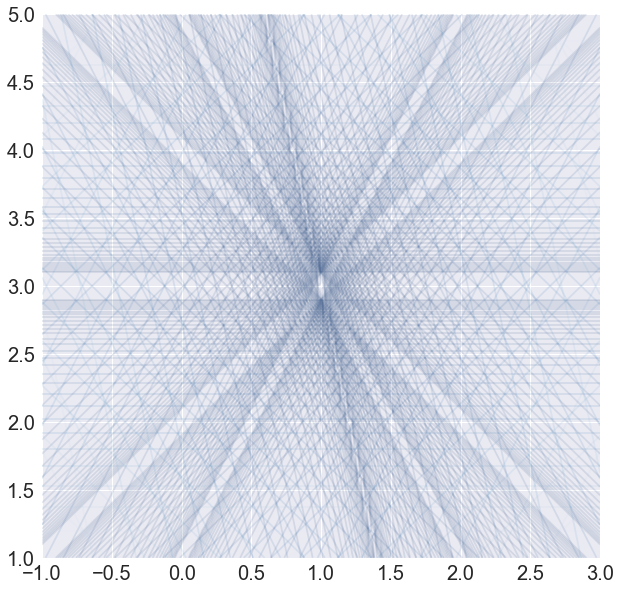

In [9]:
x_data = np.array([-2, -1, 0, 1, 2, 5])
y_data = x_data + 3


th1_range = np.linspace(-1, 3, 100)
th0_range = np.linspace(1, 5, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)

fig, ax = plt.subplots(figsize = (10,10))
ax.tick_params(axis = 'both', labelsize = 20)
for data_idx, (x,y) in enumerate(zip(x_data, y_data)):
    loss = np.power(y - (Th1*x + Th0), 2)
    
    levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
    cmap = cm.get_cmap('Blues_r', lut = len(levels))
    ax.contour(Th1, Th0, loss,
               levels = levels, cmap = cmap,
               alpha = 0.1)

위의 그림은 PA 4-04에서 많이 사용되기 때문에 get_contours 함수로 만들어줍니다.

이 함수의 기능은 x_data, y_data에 대한 contour plot을 곂쳐서 그려줍니다.  
이에 따라 get_contours의 input은 다음과 같고 contour plot을 그려주는 역할이기 때문에 return은 없습니다.

- INPUT : x_data, y_dadta, ax, alpha

위의 ax는 contour plot을 그릴 axes이고, alpha는 contour plot의 투명도를 말합니다.

다음은 get_contours 함수와 이 함수를 사용한 코드입니다.

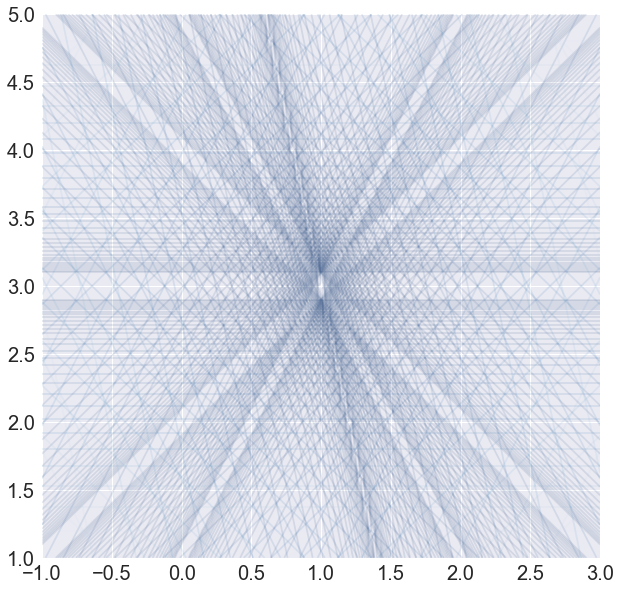

In [35]:
def get_contours(x_data, y_data, ax, alpha):
    th1_range = np.linspace(-1, 3, 100)
    th0_range = np.linspace(1, 5, 100)
    Th1, Th0 = np.meshgrid(th1_range, th0_range)

    ax.tick_params(axis = 'both', labelsize = 20)
    for data_idx, (x,y) in enumerate(zip(x_data, y_data)):
        loss = np.power(y - (Th1*x + Th0), 2)

        levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
        cmap = cm.get_cmap('Blues_r', lut = len(levels))
        ax.contour(Th1, Th0, loss,
                   levels = levels, cmap = cmap,
                   alpha = alpha)
        
x_data = np.array([-2, -1, 0, 1, 2, 5])
y_data = x_data + 3

fig, ax = plt.subplots(figsize = (10,10))
get_contours(x_data, y_data, ax, 0.1)

***
## Step.2 Learning with Two Data Samples

Step.2에서는 2개의 data sample들을 가지고 있는 dataset에 대해 학습을 진행합니다.

즉, 2개의 서로 다른 loss function에 대해 반복적으로 $\theta_{1}, \theta_{0}$를 학습시킵니다.  

***
**Programming**  
$y = x + 3$에서 만들어진 Dataset
$$\mathcal{D} = \{ (-1,2), (1,4) \}$$
에 대해 학습을 진행하세요.

이때 학습의 조건은 다음과 같습니다.
- initial theta1, theta0 = 1, 1.2
- learning rate = 0.1
- total epoch = 10

그리고 alpha값은 0.1로 설정하세요.


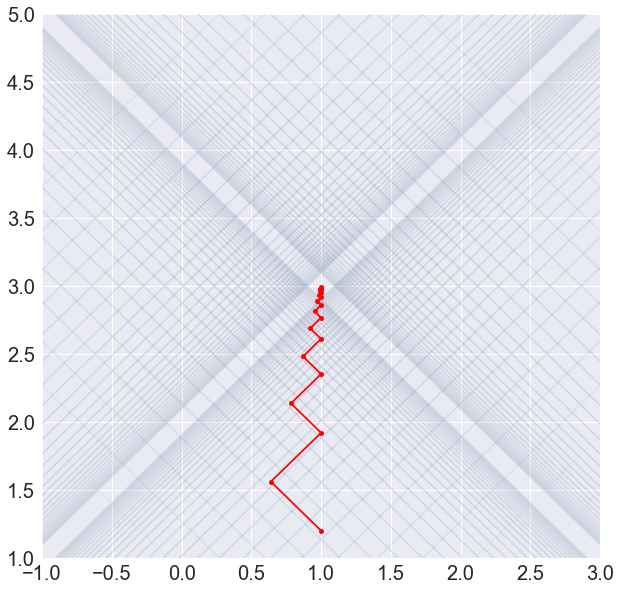

In [49]:
##### Start Your Code(Dataset Preparation) #####
x_data = np.array([-1,1])
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####


##### Start Your Code(Learning Preparation) #####
lr = 0.1
epochs = 10
th1, th0 = 1, 1.2
##### Start Your Code(Learning Preparation) #####

th1_list, th0_list = [th1], [th0]

for epoch in range(epochs):
    for x,y in zip(x_data, y_data):
        ##### Start Your Code(Gradient Descent Method) #####
        pred = th1*x + th0

        dth1 = -2*x*(y-pred)
        dth0 = -2*(y-pred)

        th1 = th1 - lr*dth1
        th0 = th0 - lr*dth0
        ##### Start Your Code(Gradient Descent Method) #####
        
        th1_list.append(th1)
        th0_list.append(th0)


fig, ax = plt.subplots(figsize = (10,10))
get_contours(x_data, y_data, ax, 0.1)
ax.plot(th1_list, th0_list,
        marker = 'o', markersize = 5,
        color = 'r')
    

***
**Programming**  
위의 학습에 관련된 부분을 trainer 함수로 구현하세요.  
이 trainer 함수는 GDM을 통한 학습을 진행한 뒤 update되는 th1, th0를 시각화해줍니다.  
trainer의 input, output은 다음과 같습니다.

- INPUT : x_data, y_data, th1, th0, lr, epochs, ax

In [39]:
def trainer(x_data, y_data, th1, th0, lr, epochs, ax):
    ##### Start Your Code(Trainer Functionalization) #####
    th1_list, th0_list = [th1], [th0]

    for epoch in range(epochs):
        for x,y in zip(x_data, y_data):
            pred = th1*x + th0

            dth1 = -2*x*(y-pred)
            dth0 = -2*(y-pred)

            th1 = th1 - lr*dth1
            th0 = th0 - lr*dth0

            th1_list.append(th1)
            th0_list.append(th0)

    ax.plot(th1_list, th0_list,
            marker = 'o', markersize = 5,
            color = 'r')
    ##### Start Your Code(Trainer Functionalization) #####


get_contours와 trainer 함수를 이용하여 학습을 시각화하세요.

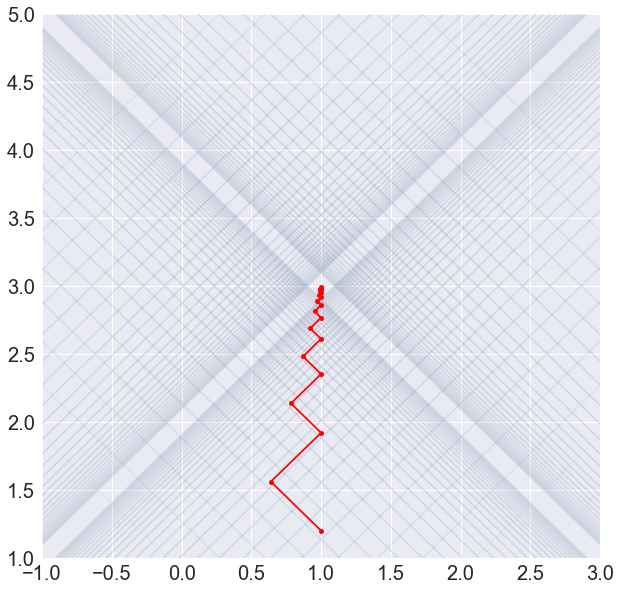

In [40]:
##### Start Your Code(Dataset Preparation) #####
x_data = np.array([-1,1])
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####

##### Start Your Code(Learning Preparation) #####
th1, th0 = 1, 1.2
lr = 0.1
epochs = 10
##### End Your Code(Learning Preparation) #####


fig, ax = plt.subplots(figsize = (10,10))
##### Start Your Code(gen_contours and trainer Functions) #####
get_contours(x_data, y_data, ax, 0.1)
trainer(x_data, y_data, th1, th0, lr, epochs, ax)
##### End Your Code(gen_contours and trainer Functions) #####

***
**Programming**  
$$\mathcal{D} = \{ (-2,1), (2,5) \}$$
에 대해 학습을 진행하고, 시각화된 결과를 분석하세요.

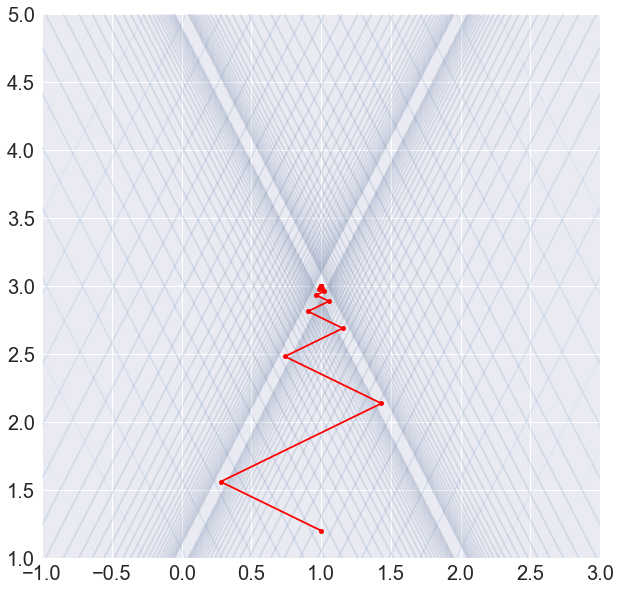

In [48]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([-2,2])
y_data = x_data + 3

th1, th0 = 1, 1.2
lr = 0.1
epochs = 10
##### Start Your Code(Learning Preparation) #####

fig, ax = plt.subplots(figsize = (10,10))
##### Start Your Code(gen_contours and trainer Functions) #####
get_contours(x_data, y_data, ax, 0.1)
trainer(x_data, y_data, th1, th0, lr, epochs, ax)
##### End Your Code(gen_contours and trainer Functions) #####

***
**Programming**  
$$\mathcal{D} = \{ (1,4), (2,5) \}$$
에 대해 학습을 진행하고, 시각화된 결과를 분석하세요.

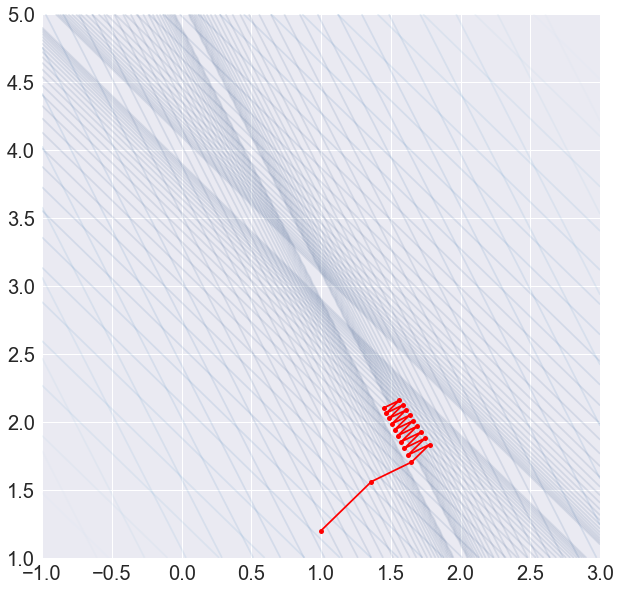

In [50]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([1,2])
y_data = x_data + 3

th1, th0 = 1, 1.2
lr = 0.1
epochs = 10
##### End Your Code(Learning Preparation) #####

fig, ax = plt.subplots(figsize = (10,10))
##### Start Your Code(gen_contours and trainer Functions) #####
get_contours(x_data, y_data, ax, 0.1)
trainer(x_data, y_data, th1, th0, lr, epochs, ax)
##### End Your Code(gen_contours and trainer Functions) #####

***
## Step.3 Learning with Many Data Samples

Step.3에서는 6개의 data sample에 대해 $\theta_{1}, \theta_{0}$를 학습시켜봅니다.  
이를 통해 각 data sample들의 loss function들이 학습에 어떤 영향을 미치는지 분석합니다.

***
**Programming**  
먼저 x의 절댓값이 1에 가까운 data sample들을 이용하여 학습시킬 때의 경향을 살펴봅니다.  
모두 $y = x+3$에서부터 만들어지며 x data값들은 다음과 같습니다.
$$\{ -1.2, -1, -0.8, 0.8, 1, 1.2 \}$$
위의 dataset에 대해 학습을 진행하고 결과를 시각화하세요.

그리고 학습이 일어나는 경향을 분석해보세요.

이때 학습 조건은 다음과 같습니다.  
- initial theta1, theta0 = 1, 1.2
- learning rate = 0.2
- total epoch = 10

그리고 alpha값은 0.1로 설정하세요.

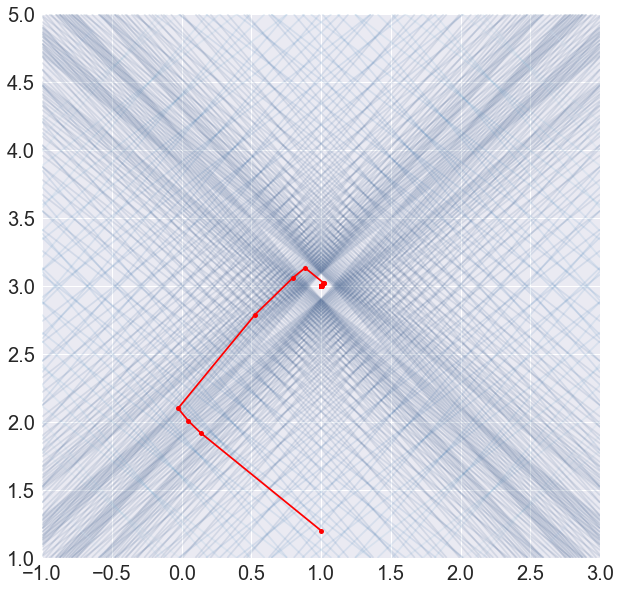

In [63]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([-1.2, -1, -0.8, 0.8, 1, 1.2])
y_data = x_data + 3

th1, th0 = 1, 1.2
lr = 0.2
epochs = 10
##### End Your Code(Learning Preparation) #####


##### Start Your Code(gen_contours and trainer Functions) #####
fig, ax = plt.subplots(figsize = (10,10))
get_contours(x_data, y_data, ax, 0.1)
trainer(x_data, y_data, th1, th0, lr, epochs, ax)
##### Start Your Code(gen_contours and trainer Functions) #####

***
**Programming**  
다음은 x의 절댓값이 1보다 작은 data sample들에 대한 학습입니다.

다음 x data들에 대해 학습을 진행하고 결과를 시각화하세요.
$$\{ -0.3, -0.2, -0.1, 0.1, 0.2, 0.3 \}$$

그리고 학습이 일어나는 경향을 분석해보세요.

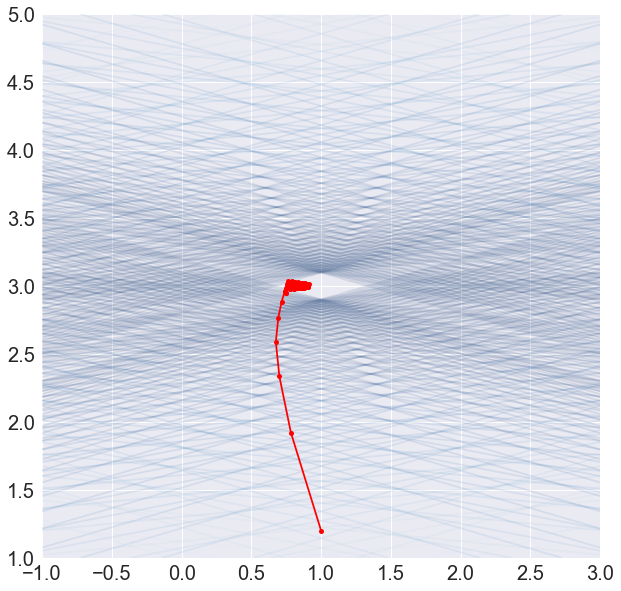

In [65]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([-0.3, -0.2, -0.1, 0.1, 0.2, 0.3])
y_data = x_data + 3

th1, th0 = 1, 1.2
lr = 0.2
epochs = 10
##### End Your Code(Learning Preparation) #####


fig, ax = plt.subplots(figsize = (10,10))
##### Start Your Code(gen_contours and trainer Functions) #####
get_contours(x_data, y_data, ax, 0.1)
trainer(x_data, y_data, th1, th0, lr, epochs, ax)
##### End Your Code(gen_contours and trainer Functions) #####

***
**Programming**  
다음은 x의 절댓값이 1보다 큰 data sample들에 대한 학습입니다.

다음 x data들에 대해 학습을 진행하고 결과를 시각화하세요.
$$\{ -3, -2.5, -2, 2, 2.5, 3 \}$$

그리고 학습이 일어나는 경향을 분석해보세요.

**중요!** 위의 학습조건에서는 $\theta_{1}, \theta_{0}$가 발산하는 모습을 보입니다. 그 원인을 분석하고 $\theta_{1}^{*}, \theta_{0}^{*}$을 얻기 위해 어떻게 해야하는지 생각해보세요.

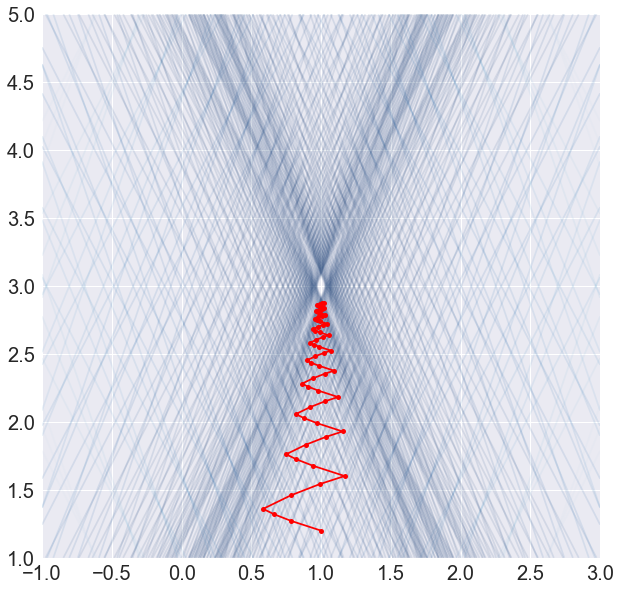

In [70]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([-3,-2.5,-2, 2, 2.5,3])
y_data = x_data + 3

th1, th0 = 1, 1.2
lr = 0.02
epochs = 10
##### End Your Code(Learning Preparation) #####


fig, ax = plt.subplots(figsize = (10,10))
##### Start Your Code(gen_contours and trainer Functions) #####
get_contours(x_data, y_data, ax, 0.1)
trainer(x_data, y_data, th1, th0, lr, epochs, ax)
##### End Your Code(gen_contours and trainer Functions) #####

***
## Step.4 Learning with Normal Distributions

Step.4에서는 Step.3에서의 내용을 바탕으로 normal distribution에서의 학습을 분석합니다.

normal distribution의 parameter는 mean, standard deviation 2가지로,  
이 2가지를 바꿀 때 dataset의 특성이 바뀌고, 이 변화에 따라 학습에 미치는 영향을 살펴봅니다.

***
**Programming**  
먼저 standard normal distribution에서부터 100개의 data sample을 만들어 학습을 시켜봅니다.  
참고로 standard normal distribution의 mean은 0, standard deviation은 1입니다.

Step.4에서의 학습조건은 다음과 같습니다.
- Initial theta1, theta0 = 1, 1.2
- learning rate = 0.01
- total epoch = 1

그리고 alpha값은 0.01로 설정하세요.  
(Hint.1) np.random.normal(loc = , scale = , size = )

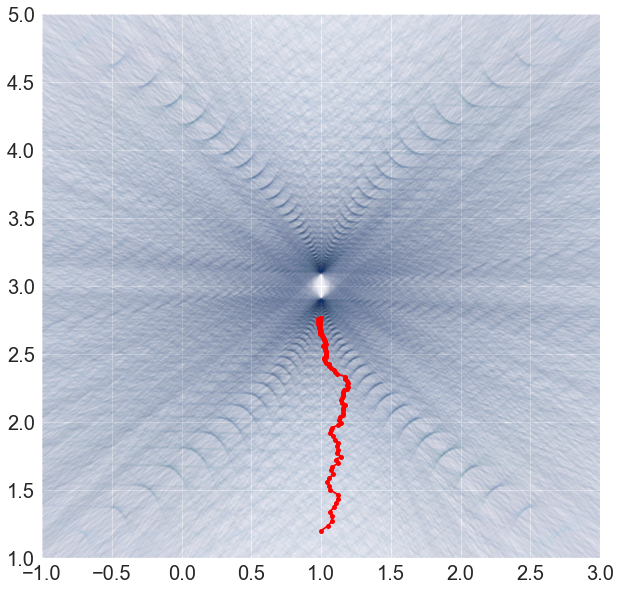

In [71]:
##### Start Your Code(Learning Preparation) #####
mu, sigma = 0, 1
n_sample = 100

x_data = np.random.normal(mu, sigma, n_sample)
y_data = x_data + 3

th1, th0 = 1, 1.2
lr = 0.01
epochs = 1
##### Start Your Code(Learning Preparation) #####


fig, ax = plt.subplots(figsize = (10,10))
##### Start Your Code(gen_contours and trainer Functions) #####
get_contours(x_data, y_data, ax, 0.01)
trainer(x_data, y_data, th1, th0, lr, epochs, ax)
##### End Your Code(gen_contours and trainer Functions) #####

***
**Programming**  
다음의 조건에서부터 dataset을 만들고 학습을 진행하세요.  
- mean = 0
- std = 4  

그리고 학습 결과를 dataset의 특성과 연관지어 해석하세요.

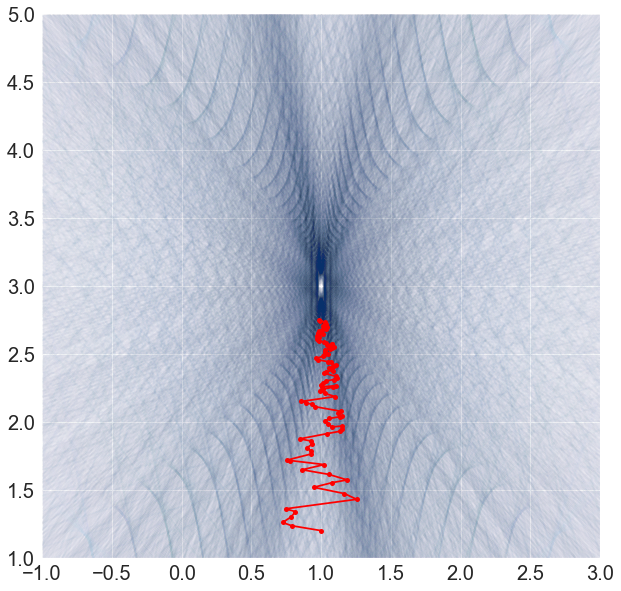

In [72]:
##### Start Your Code(Learning Preparation) #####
mu, sigma = 0, 4
n_sample = 100

x_data = np.random.normal(mu, sigma, n_sample)
y_data = x_data + 3

th1, th0 = 1, 1.2
lr = 0.01
epochs = 1
##### End Your Code(Learning Preparation) #####


fig, ax = plt.subplots(figsize = (10,10))
##### Start Your Code(gen_contours and trainer Functions) #####
get_contours(x_data, y_data, ax, 0.01)
trainer(x_data, y_data, th1, th0, lr, epochs, ax)
##### End Your Code(gen_contours and trainer Functions) #####

***
**Programming**  
다음의 조건에서부터 dataset을 만들고 학습을 진행하세요.  
- mean = 0
- std = 0.2

그리고 학습 결과를 dataset의 특성과 연관지어 해석하세요.

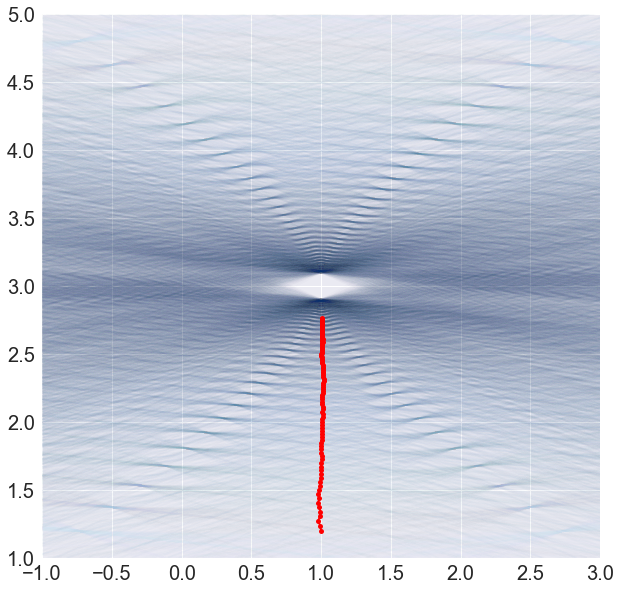

In [75]:
##### Start Your Code(Learning Preparation) #####
mu, sigma = 0, 0.2
n_sample = 100

x_data = np.random.normal(mu, sigma, n_sample)
y_data = x_data + 3

th1, th0 = 1, 1.2
lr = 0.01
epochs = 1
##### End Your Code(Learning Preparation) #####


fig, ax = plt.subplots(figsize = (10,10))
##### Start Your Code(gen_contours and trainer Functions) #####
get_contours(x_data, y_data, ax, 0.01)
trainer(x_data, y_data, th1, th0, lr, epochs, ax)
##### End Your Code(gen_contours and trainer Functions) #####

***
**Programming**  
다음의 조건에서부터 dataset을 만들고 학습을 진행하세요.  
- mean = 2
- std = 1 

그리고 학습 결과를 dataset의 특성과 연관지어 해석하세요.

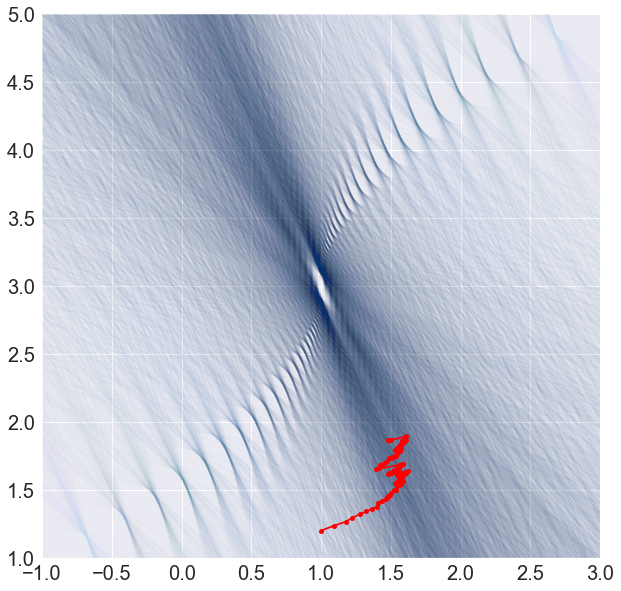

In [73]:
##### Start Your Code(Learning Preparation) #####
mu, sigma = 2, 1
n_sample = 100

x_data = np.random.normal(mu, sigma, n_sample)
y_data = x_data + 3

th1, th0 = 1, 1.2
lr = 0.01
epochs = 1
##### End Your Code(Learning Preparation) #####


fig, ax = plt.subplots(figsize = (10,10))
##### Start Your Code(gen_contours and trainer Functions) #####
get_contours(x_data, y_data, ax, 0.01)
trainer(x_data, y_data, th1, th0, lr, epochs, ax)
##### End Your Code(gen_contours and trainer Functions) #####

***
**Programming**  
다음의 조건에서부터 dataset을 만들고 학습을 진행하세요.  
- mean = -2
- std = 1

그리고 학습 결과를 dataset의 특성과 연관지어 해석하세요.

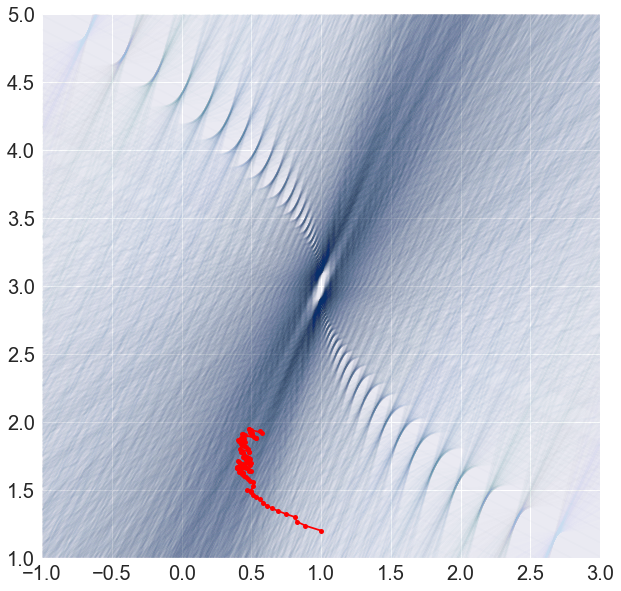

In [74]:
##### Start Your Code(Learning Preparation) #####
mu, sigma = -2, 1
n_sample = 100

x_data = np.random.normal(mu, sigma, n_sample)
y_data = x_data + 3

th1, th0 = 1, 1.2
lr = 0.01
epochs = 1
##### Start Your Code(Learning Preparation) #####


fig, ax = plt.subplots(figsize = (10,10))
##### Start Your Code(gen_contours and trainer Functions) #####
get_contours(x_data, y_data, ax, 0.01)
trainer(x_data, y_data, th1, th0, lr, epochs, ax)
##### End Your Code(gen_contours and trainer Functions) #####